In [63]:
import matplotlib.pyplot as plt

def plot(P,scheme):
    datasets = []
    plt.figure()
    
    plt.title(scheme, fontdict=None, loc='center', pad=None)

    for i in range(len(P)):
        poly = P[i].copy()
        poly.append(poly[0]) #repeat the first point to create a 'closed loop'
    
        xs, ys = zip(*poly) #create lists of x and y values

        plt.plot(xs,ys) 
        datasets.append(str(i))
       

    plt.legend(datasets)
    plt.show() # if you need...

In [64]:
def ChaikinSubdivisionClosedPolygon(N,Polygon): ##int N, Point *P, Point *Q):
    P = Polygon.copy()
    for n in range(N-1):
        Pnew = []
        
        for i in range(len(P[n])-1):
            x1   = 3/4 * P[n][i][0] + 1/4 * P[n][i+1][0]
            y1   = 3/4 * P[n][i][1] + 1/4 * P[n][i+1][1]
            x2   = 1/4 * P[n][i][0] + 3/4 * P[n][i+1][0]
            y2   = 1/4 * P[n][i][1] + 3/4 * P[n][i+1][1]
            
            Pnew.append([x1,y1])  
            Pnew.append([x2,y2])  
            
            #Q[2*i].x = 3./4. * P[i].x + 1./4. * P[i+1].x
            #Q[2*i].y = 3./4. * P[i].y + 1./4. * P[i+1].y
            #Q[2*i+1].x = 1./4. * P[i].x + 3./4. * P[i+1].x
            #Q[2*i+1].y = 1./4. * P[i].y + 3./4. * P[i+1].y
            
        i = len(P[n])-1
        x1   = 3/4 * P[n][i][0] + 1/4 * P[n][0][0]
        y1   = 3/4 * P[n][i][1] + 1/4 * P[n][0][1]
        x2   = 1/4 * P[n][i][0] + 3/4 * P[n][0][0]
        y2   = 1/4 * P[n][i][1] + 3/4 * P[n][0][1]
        
        Pnew.append([x1,y1])  
        Pnew.append([x2,y2]) 
        
        #Q[2*i].x = 3./4. * P[i].x + 1./4. * P[0].x
        #Q[2*i].y = 3./4. * P[i].y + 1./4. * P[0].y
        #Q[2*i+1].x = 1./4. * P[i].x + 3./4. * P[0].x
        #Q[2*i+1].y = 1./4. * P[i].y + 3./4. * P[0].y
        
        P.append(Pnew)

    return P


In [65]:
def CornerCuttingSubdivisionClosedPolygon(A,B,N,Polygon): #double A, double B, int N, Point *P, Point *Q
    P = Polygon.copy()
    for n in range(N-1):
        Pnew = []
        
        for i in range(len(P[n])-1):
            x1   = A * P[n][i][0] + (1-A) * P[n][i+1][0]
            y1   = A * P[n][i][1] + (1-A) * P[n][i+1][1]
            x2   = B * P[n][i][0] + (1-B) * P[n][i+1][0]
            y2   = B * P[n][i][1] + (1-B) * P[n][i+1][1]
            
            Pnew.append([x1,y1])  
            Pnew.append([x2,y2])  
            #Q[2*i].x = A * P[i].x + (1. - A) * P[i+1].x;
            #Q[2*i].y = A * P[i].y + (1. - A) * P[i+1].y;
            #Q[2*i+1].x = B * P[i].x + (1. - B) * P[i+1].x;
            #Q[2*i+1].y = B * P[i].y + (1. - B) * P[i+1].y;
            
        i = len(P[n])-1
        x1   = A * P[n][i][0] + (1-A) * P[n][0][0]
        y1   = A * P[n][i][1] + (1-A) * P[n][0][1]
        x2   = B * P[n][i][0] + (1-B) * P[n][0][0]
        y2   = B * P[n][i][1] + (1-B) * P[n][0][1]
        
        Pnew.append([x1,y1])  
        Pnew.append([x2,y2]) 
        
        #Q[2*i].x = A * P[i].x + (1. - A) * P[0].x;
        #Q[2*i].y = A * P[i].y + (1. - A) * P[0].y;
        #Q[2*i+1].x = B * P[i].x + (1. - B) * P[0].x;
        #Q[2*i+1].y = B * P[i].y + (1. - B) * P[0].y;
        
        P.append(Pnew)

    return P


Chaikin Subdivision Scheme:


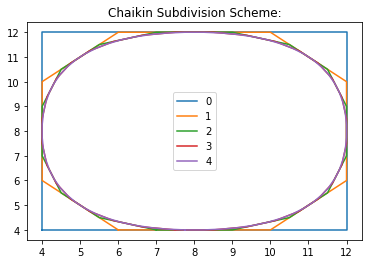

CornerCutting Subdivision Scheme (A:0.52; B:0.41):


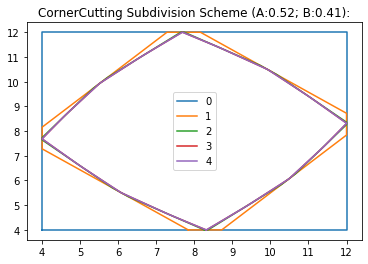

CornerCutting Subdivision Scheme (A:0.75; B:0.25):


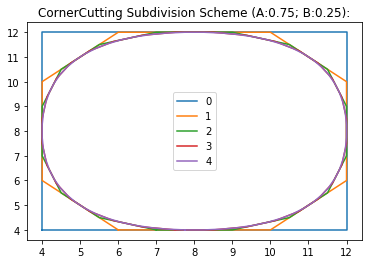

In [67]:

def main():
    
    P0 = [[100,300],[500,300],[500,500],[300,700]]
    
    P0 = [[4,4],[12,4],[12,12],[4,12]]
    Polygon = []
    Polygon.append(P0)
    
    N = 5 #AMOUNT OF ITERATIONS, not lengh of bla
    scheme = "Chaikin Subdivision Scheme:"
    print(scheme)
    Chaikin  = ChaikinSubdivisionClosedPolygon(N,Polygon)
    plot(Chaikin,scheme)

    A = 0.52
    B = 0.41
    scheme = "CornerCutting Subdivision Scheme (A:"+str(A)+"; B:"+str(B)+"):"
    print(scheme)
    CorCut_1 = CornerCuttingSubdivisionClosedPolygon( A, B , N, Polygon);
    plot(CorCut_1,scheme)

    A = 0.75
    B = 0.25
    scheme = "CornerCutting Subdivision Scheme (A:"+str(A)+"; B:"+str(B)+"):"
    print(scheme)
    CorCut_2 = CornerCuttingSubdivisionClosedPolygon( A, B , N, Polygon);
    plot(CorCut_2,scheme)


    #PostscriptOutputClosedPolygon( fout, 2 * N, P2);

    #sprintf( FileName, "Subdivision%d.txt", i+1);
    #GnuplotOutputClosedPolygon( FileName, 2 * N, P2);
    #sprintf( FileName, "AngleSubdivision%d.txt", i+1);
    #GnuplotOutputAngle( FileName, 2 * N, P2);

    #printf( "Distance Subdivision: %lf\n", LMaxDistance( N, P1, P2));


    #CopyPolygon( N, P2, P1);

    
    
if __name__ == '__main__':
    main()           
